In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../../modules')

In [6]:
import numpy as np
from maze_problem import Maze
import plotly.graph_objects as go
import common_plots

# Continuous MDP
Instead of assuming a discrete set of states and actions we can have a continuous representation by integrating over the set of states instead of summing:
$$U_{m+1}^\pi(s)=\max_a\bigg(R(s,a) + \int_{s'} T(s'|s,a)U_{m}^\pi(s') ds' \bigg)$$
Unfortunately, this integral is intractable for most reward and action functions. However, when the action has linear dynamics and the reward is quadratic then the problem can be solved efficiently. Here we imagine the states and actions as vectors. 
### Linear dynamics
A system has linear dynamics if $T_s$ is a matrix mapping state to a new mean state and $T_a$ is a matrix mapping from the action to the next state. The transition is determined:
$$T(s'|s,a)=T_s\cdot s+T_a\cdot a + w$$
Where $w$ is zero mean random noise drawn at each step (e.g Gaussian),<br>
**simple 1d case:**

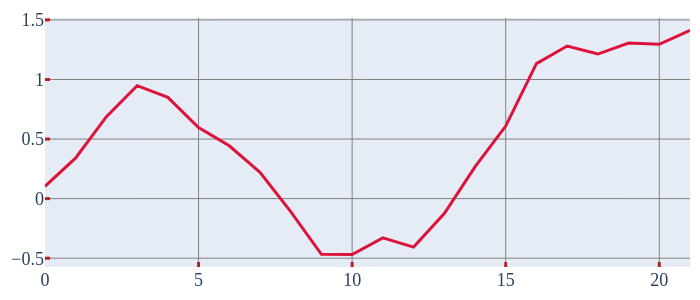

In [36]:
s = 0
actions = np.array([1,1,1,0,-1,-1,-1,-1,-1,-1,0,0,0,1,1,1,1,0,0,0,0,0])
Ts = 1.05
Ta = 0.3
state_hist = np.zeros(len(actions))
for a_index,a in enumerate(actions):
    s = Ts*s+Ta*a+np.random.normal(0,0.1)
    state_hist[a_index]=s

fig = go.Figure(data=go.Scatter(y=state_hist,
                               line=dict(color="crimson",width=3)))
fig = common_plots.set_basic_layout(fig)
fig.show(renderer="png",width=700,height=300)

### Quadtraic reward
A reward is quadratic if it is in the form:
$$R(s,a)=s^T R_s s + a^T R_a a$$
Where $R_s$ and $R_t$ are matricies. <br>
**simple 1d case (cont):**

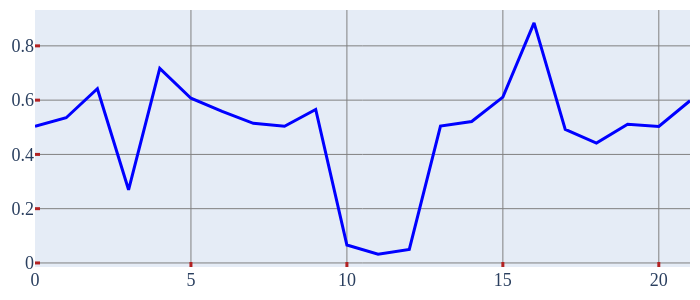

In [41]:
R_s = 0.3
R_a = 0.5
rewards = state_hist*R_s*state_hist + actions*R_a*actions

fig = go.Figure(data=go.Scatter(y=rewards,
                               line=dict(color="blue",width=3)))
fig = common_plots.set_basic_layout(fig)
fig.show(renderer="png",width=700,height=300)